# House Price - Linear Regression

## Parte 01 - EDA

#### > Importação das Bibliotecas

Download da Biblioteca **Missingno**

In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
#import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

#### > Carregamento do Dataset

Carregamento do dataset **'kc_house_data.csv'**. O comando 'set_option' permite que a tabela seja apresentada sem simplicação 

In [3]:
df = pd.read_csv('kc_house_data.csv')
pd.set_option('max_columns', None)

#### Legenda

**id** - ID \
**date** - Dia da Venda \
**price** - Preço da Venda \
**bedrooms** - Número de quartos \
**bathrooms** - Número de banheiros, onde 0,5 corresponde a um lavabo \
**sqft_living** - Metragem quadrada da área interna \
**sqft_lot** - Metragem quadrada do Terreno \
**floors** - Número de andares \
**waterfront** - Se a casa é de frente para o mar \
**view** - Um índice de 0 a 4 de qualidade da vista \
**condition** - Um índice de 1 a 5 sobre a condição da casa \
**grade** - Um índice de 1 a 13, onde 1-3 tem uma construção e design do edifício de baixa qualidade, 7 tem um nível médio de construção e design e 11-13 tem um nível de construção e design de alta qualidade \
**sqft_above** - A metragem quadrada do espaço habitacional interior que está acima do nível do solo \
**sqft_basement** - A metragem quadrada do espaço habitacional interior que está abaixo do nível do solo \
**yr_built** - Ano de Construção \
**yr_renovated** - Ano de Reforma \
**zipcode** - Código Postal \
**lat** - Latitude \
**long** - Longitude \
**sqft_living15** - A metragem quadrada do espaço interno da casa para os 15 vizinhos mais próximos \
**sqft_lot15** - A metragem quadrada dos lotes de terreno dos 15 vizinhos mais próximos 

#### > Verificação do Dataset

Verificação do tamanho do Dataset

In [4]:
df.shape

(21613, 21)

Features do modelo

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Verificando as informações do Dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Nessa primeira informação, podemos ver que o nosso dataset se encontra sem valores nulo, isso pode ser percebido pela presença de valores iguais em todas as features.

Avaliando o dataset de forma aleatória

In [7]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3782,7243500025,20140519T000000,411000.0,4,2.75,2500,5257,2.0,0,0,3,8,2500,0,1966,0,98118,47.5293,-122.287,1660,5970
14580,9528104910,20140909T000000,796000.0,4,3.25,2110,3000,2.0,0,0,3,8,2110,0,2001,0,98115,47.6769,-122.328,1780,4000
8576,7214820610,20141007T000000,448000.0,4,1.75,2560,8270,1.0,0,0,3,7,1480,1080,1979,0,98072,47.7572,-122.147,2320,8450
9351,2413300730,20140924T000000,263500.0,4,1.75,2210,6375,1.0,0,0,3,8,1640,570,1977,0,98003,47.3268,-122.328,2070,7210
4699,6648150090,20150108T000000,1195000.0,4,4.00,4050,9517,2.0,0,0,3,11,3360,690,1990,0,98040,47.5769,-122.215,3330,9436


Verificando a existencia de dados duplicados na coluna **'ID'**

In [8]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

Como podemos avaliar, o **'ID'** não apresenta valores unicos para o df, com isso, não podemos usar ele como index. Assim sendo, decidi retirar essa feature do nosso dataset

In [9]:
df.drop(['id'],axis=1,inplace=True)

In [10]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


Após a utilização do 'describe()', é possivel observar alguns pontos:\
Na coluna **'Price'**
> Podemos perceber que a média de Preço dos imovéis é igual a 540088,14. Porém apresentamos mais valores com Preço menor que a média, isso pode ser concluido pela mediana (450000,00) ser menor que a média. O maior valor foi de 770000,00 e o menor foi de 75000,00. 

Na coluna **'bedrooms'**
> É possivel identificar qua a média de Dormitórios é igual a 3, no caso estou arredondando o valor para baixo, pois não é possivel obter valores quebrados para esse tipo. Conforme visto na coluna anterior, apresenta uma quantidade de Dormitorios menor que a média, devido a comparação com a mediana (3). O valor maxímo foi de 33 e o minimo foi de 0.

Na coluna **'bathrooms'**
> É possivel identificar qua a média de Banheiros é igual a 2, no caso estou arredondando o valor para baixo, pois não é possivel obter valores quebrados para esse tipo. Conforme visto na coluna anterior, apresenta uma quantidade de Banheiros maior que a média, devido a comparação com a mediana (2). O valor maxímo foi de 8 e o minimo foi de 0.

#### > Gráficos

Esse primeiro grafico é uma forma sutil de avaliar se podemos avaliar correlação entre as features

A partir dessa primeira analise podemos identificar alguns pontos importantes, como a nossa pergunta visa trazer como resultado o valor de um imovel a partir de especificações dadas, podemos observar que:
Features que mais influenciam no preço:
> **'bathroom'**\
> **'sqft_living'**\
> **'grade'**\
> **'sqft_above'**\
> **'sqft_living15'**

Features que mais influencima negativamente no preço:
> **'zipcode'**

Features com influencia conjunta:
> **'sqfr_living15'**\
> **'sqft_lot15'**\

Isso se deve a relação do tamanho dos lot ao redor

<AxesSubplot:>

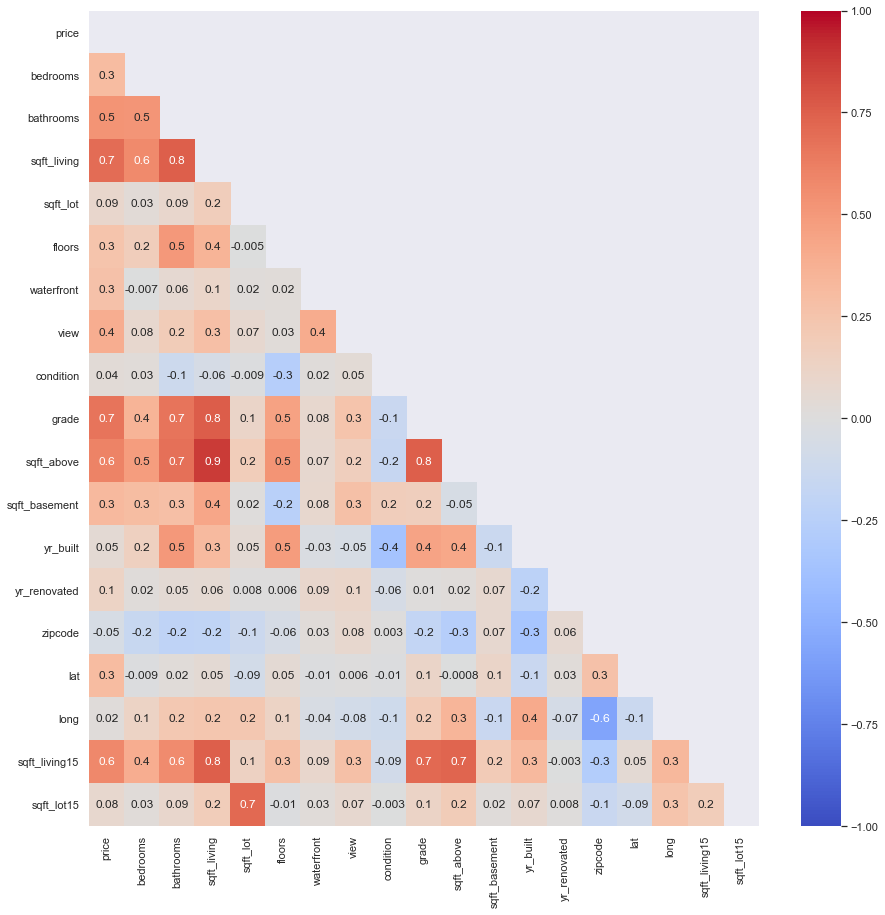

In [11]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df.corr(),annot=True, fmt='.1g',vmin=-1,vmax=1,center=0,cmap='coolwarm', mask=mask)

##### > **Gráfico das features**

**BEDROOMS**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Quantidade Total')

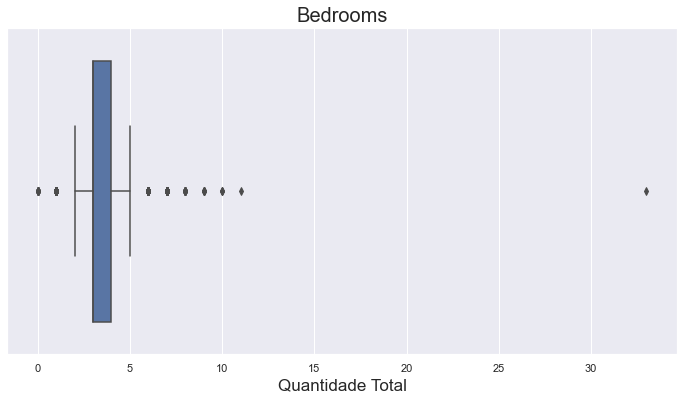

In [12]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.boxplot(df['bedrooms'])
ax.set_title('Bedrooms',fontsize=20)
ax.set_xlabel('Quantidade Total',fontsize=17)

[]

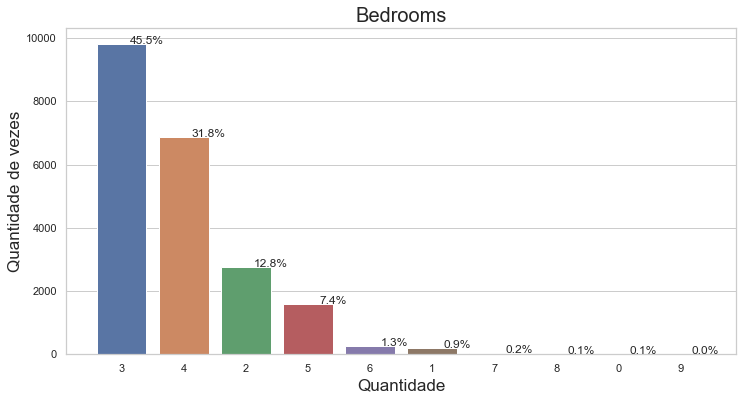

In [13]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='bedrooms', data=df, order = df['bedrooms'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Bedrooms',fontsize=20)
ax.set_xlabel('Quantidade',fontsize=17)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['bedrooms'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

Podemos observar que possuimos mais casas vendidas com 2 a 5 quartos disponíveis

**BATHROOMS**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Quantidade Total')

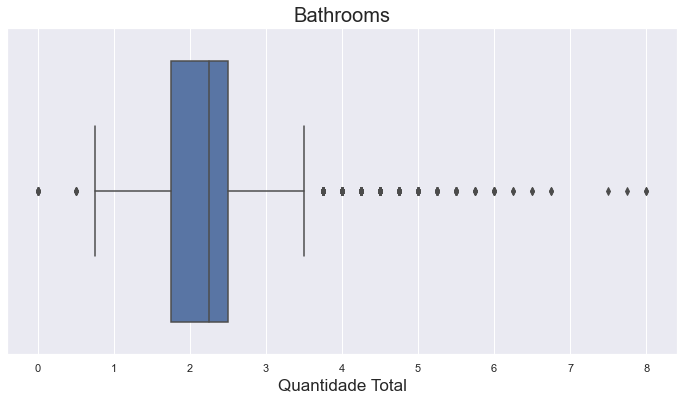

In [14]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.boxplot(df['bathrooms'])
ax.set_title('Bathrooms',fontsize=20)
ax.set_xlabel('Quantidade Total',fontsize=17)

[]

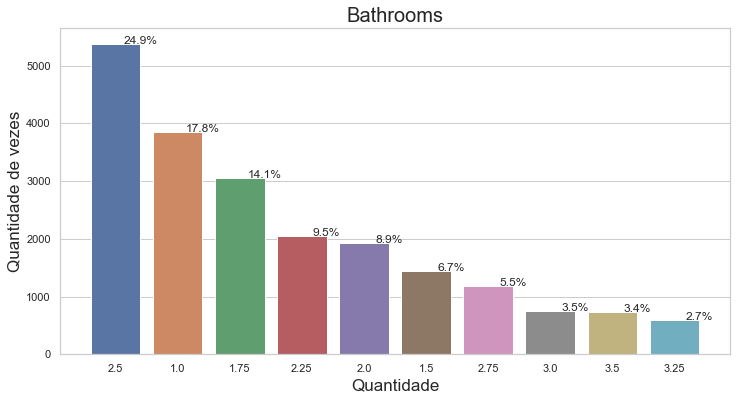

In [15]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='bathrooms', data=df, order = df['bathrooms'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Bathrooms',fontsize=20)
ax.set_xlabel('Quantidade',fontsize=17)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['bathrooms'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

Podemos observar que possuimos mais casas vendidas com 1 a 3 banheiros disponíveis

**SQFT_LIVING**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Espaço')

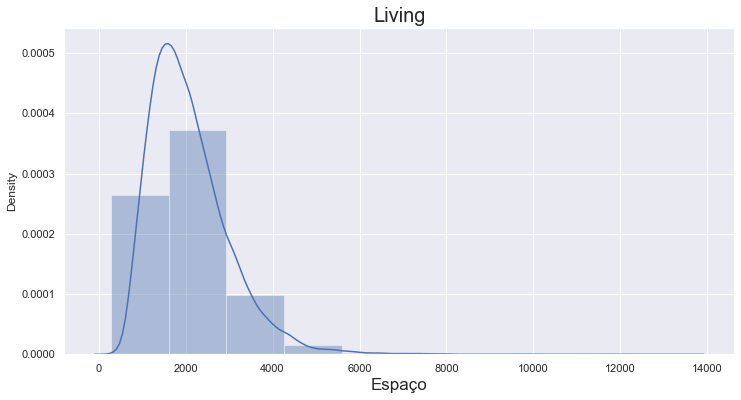

In [16]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.distplot(df['sqft_living'], bins= 10)
ax.set_title('Living',fontsize=20)
ax.set_xlabel('Espaço',fontsize=17)

**FLOORS**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Quantidade Total')

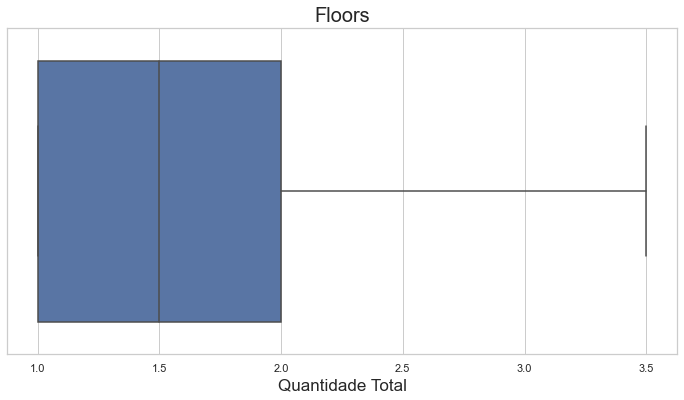

In [17]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.boxplot(df['floors'])
ax.set_title('Floors',fontsize=20)
ax.set_xlabel('Quantidade Total',fontsize=17)

[]

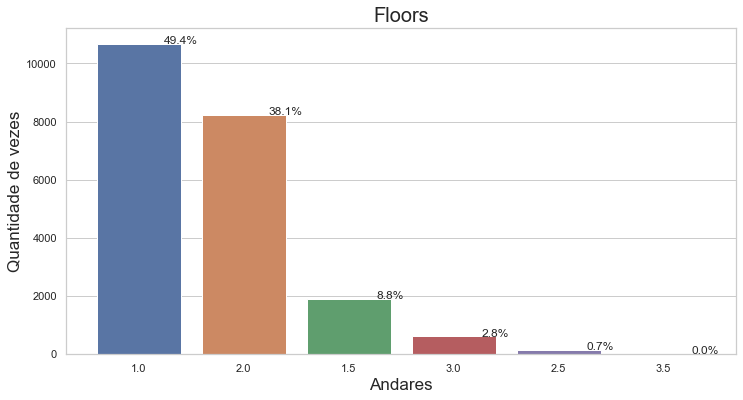

In [18]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='floors', data=df, order = df['floors'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Floors',fontsize=20)
ax.set_xlabel('Andares',fontsize=17)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['floors'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

Podemos perceber que grande parte do dataset apresenta entre 1 a 2 andares

**WATERFRONT**

[]

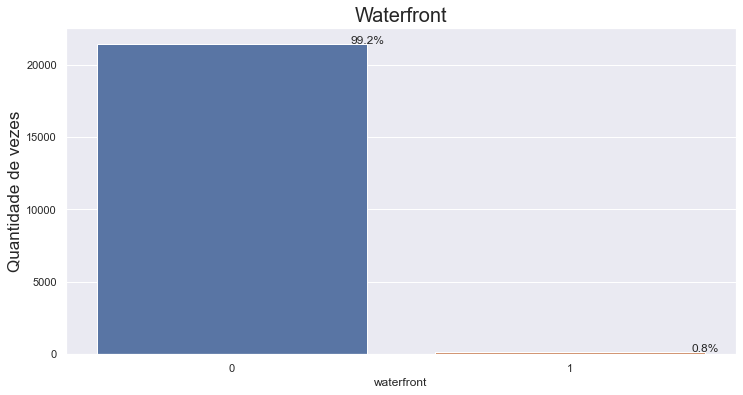

In [19]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='waterfront', data=df, order = df['waterfront'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Waterfront',fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['floors'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

Podemos ver que grande parte das casas não possuem vista para o mar

**VIEW**

[]

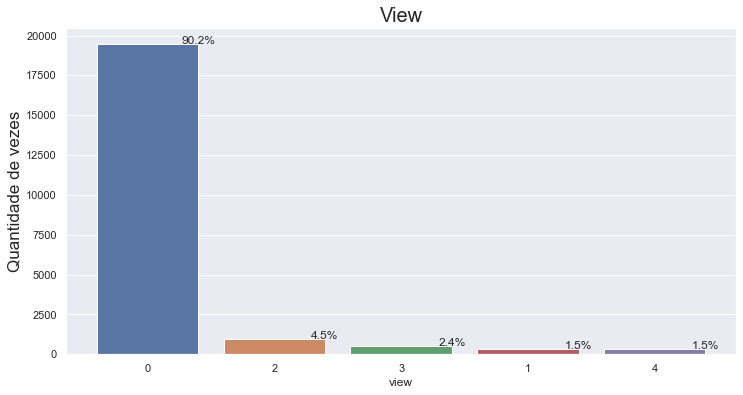

In [20]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='view', data=df, order = df['view'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('View',fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['view'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

A maioria das casas de casas recebeu 0 nota da vista 

**CONDITION**

[]

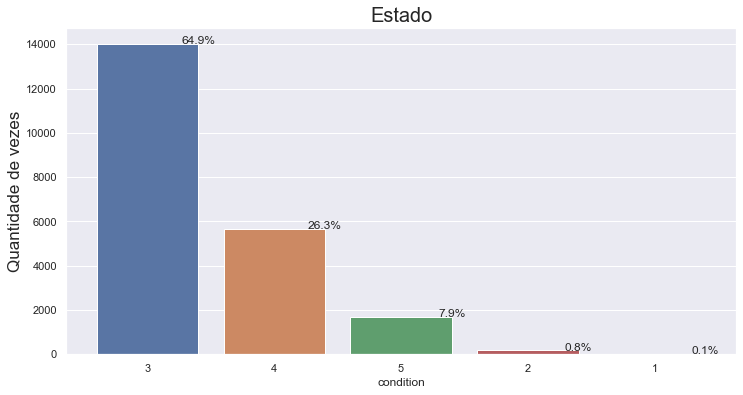

In [21]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='condition', data=df, order = df['condition'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Estado',fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['condition'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

A maioria das casas estão como classificação 3 para o estado da moradia

**GRADE**

[]

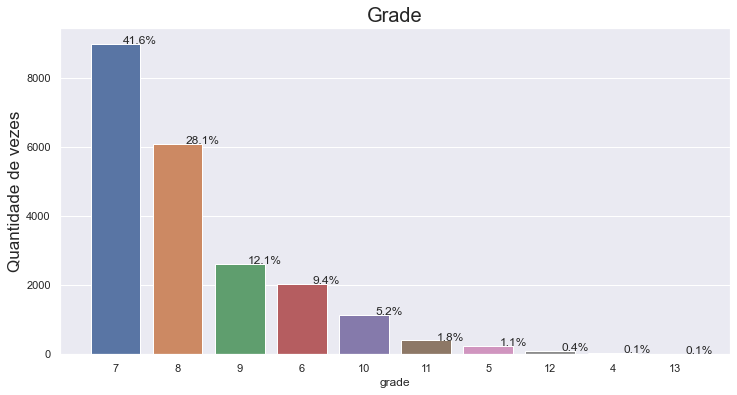

In [22]:
fig,ax = plt.subplots()
sns.set(style='darkgrid')
fig.set_size_inches(12,6)
ax = sns.countplot(x='grade', data=df, order = df['grade'].value_counts().iloc[:10].index)
ax.set_ylabel('Quantidade de vezes',fontsize=17)
ax.set_title('Grade',fontsize=20)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/df['grade'].count())
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

plt.plot()

Mais da metade das casas estão classficadas com notas entre 6 a 9, em relação ao seu design e contrução

**YR_BUILT**

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Ano')

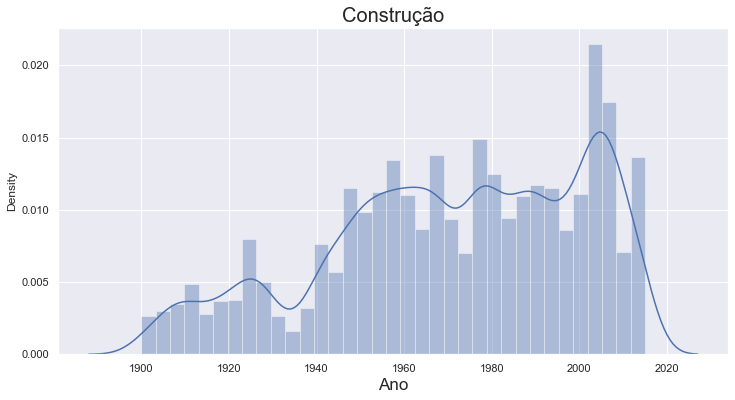

In [23]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.distplot(df['yr_built'])
ax.set_title('Construção',fontsize=20)
ax.set_xlabel('Ano',fontsize=17)

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Ano')

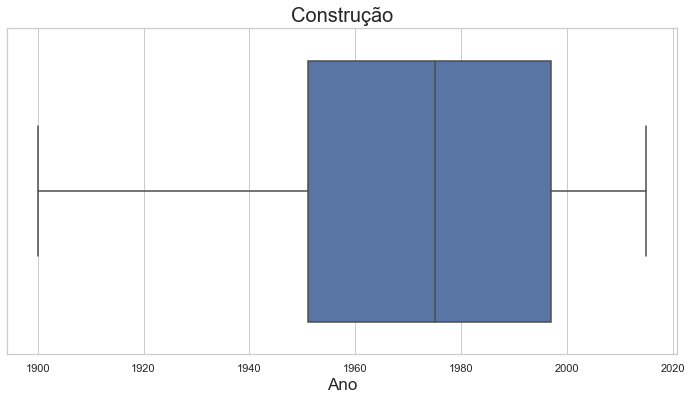

In [24]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.boxplot(df['yr_built'])
ax.set_title('Construção',fontsize=20)
ax.set_xlabel('Ano',fontsize=17)

A maioria das casas vendidas foram construidas entre os anos de 1951 a 1997

**LAT e LON**

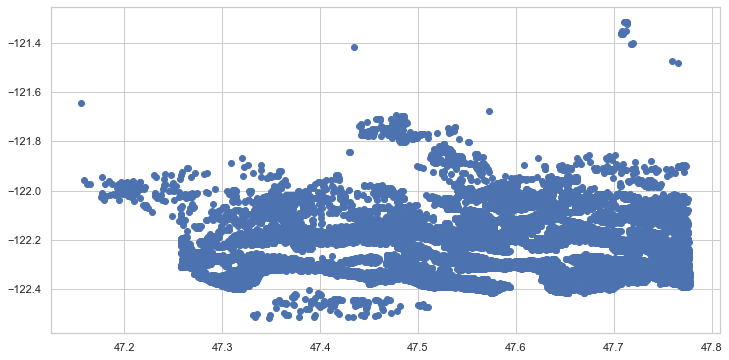

In [25]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
plt.scatter(x=df['lat'], y=df['long'])
plt.show()

C:\Users\Vithep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Quantidade Total')

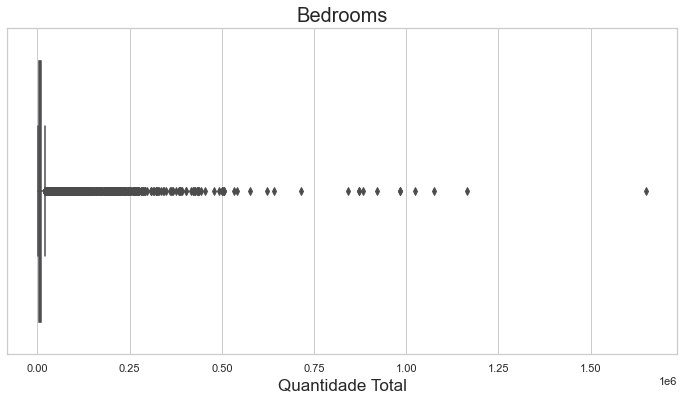

In [26]:
fig,ax = plt.subplots()
sns.set(style='whitegrid')
fig.set_size_inches(12,6)
ax = sns.boxplot(df['sqft_lot'])
ax.set_title('Bedrooms',fontsize=20)
ax.set_xlabel('Quantidade Total',fontsize=17)